In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
df = pd.read_csv("C:/Users/vigne/Downloads/archive (3)/Titanic-Dataset.csv")

# Drop non-numeric or irrelevant columns
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\vigne\AppData\Local\Temp\ipykernel_4024\2367037246.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [2]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict probabilities and labels
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

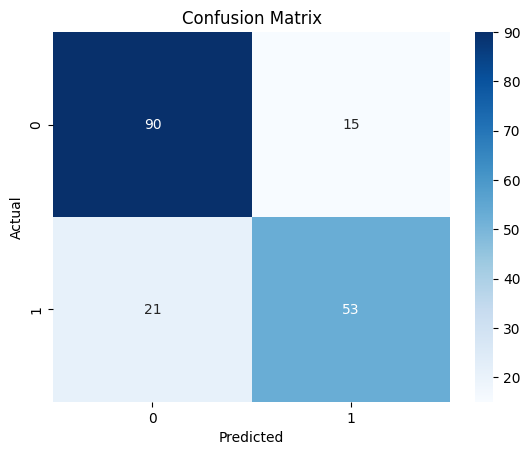

Precision: 0.78
Recall: 0.72
ROC AUC: 0.88


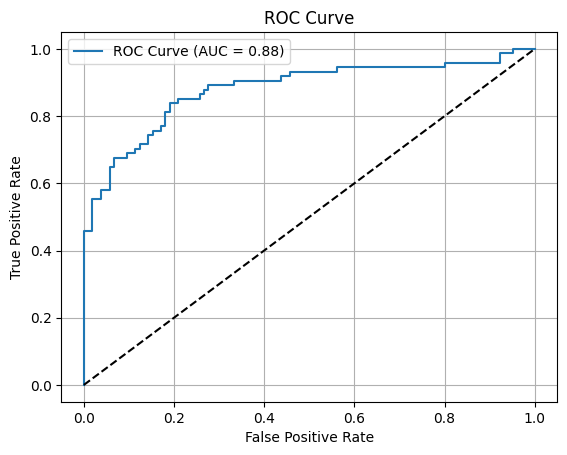

In [3]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precision, Recall, ROC-AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

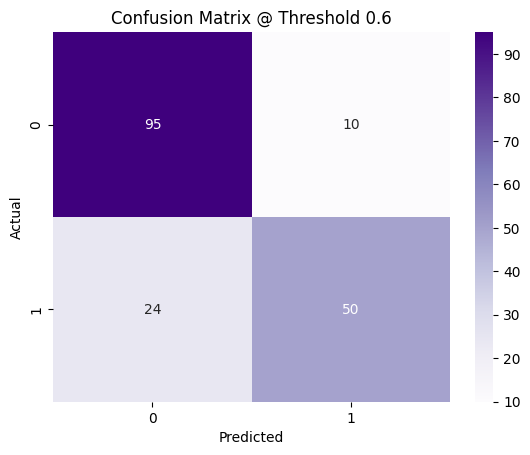

In [4]:
import numpy as np

# Custom threshold
custom_threshold = 0.6
y_pred_custom = (y_proba >= custom_threshold).astype(int)

# Confusion matrix for custom threshold
cm_custom = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Purples')
plt.title(f"Confusion Matrix @ Threshold {custom_threshold}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

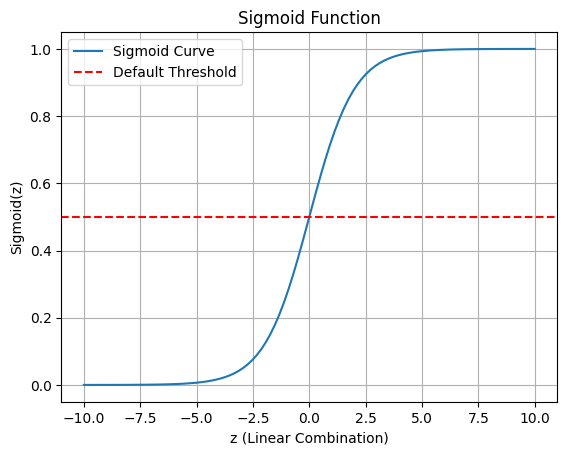

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function definition
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot sigmoid function
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z), label='Sigmoid Curve')
plt.axhline(0.5, color='red', linestyle='--', label='Default Threshold')
plt.xlabel("z (Linear Combination)")
plt.ylabel("Sigmoid(z)")
plt.title("Sigmoid Function")
plt.legend()
plt.grid(True)
plt.show()